# TAREFA: DIABETES
### Construir uma rede que seja capaz de diagnosticar diabetes, oferecidos os dados de entrada dos pacientes.  

Para isto, vamos precisar do pandas para fazer a importação dos arquivos, que estão em .csv no site https://clearnightsrthebest.com/teaching-ensino/ - usaremos o wget para fazer o download.  
Este código foi feito com grande ajuda do site: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [5]:
!pip install wget

Agora vamos importar o dataset e realizar o download/extração, se necessário!

In [6]:
import wget
import zipfile
from zipfile import ZipFile
import os

if os.path.exists('./dados_dia.zip'):
    print(' ** Dataset already downloaded!')
    if os.path.exists('Pima-Diabetes.csv'):
        print(' ** Dataset already extracted! You may proceed.')
    else:
        print(' ** Extracting files...')
        with zipfile.ZipFile("dados_dia.zip", 'r') as zip_ref:
            zip_ref.extractall()
        print(' ** Done! Your dataset is ready to rock.')
else:
    print(' ** Downloading files...')
    wget.download('https://clearskiesrbest.files.wordpress.com/2020/09/dados_dia.zip')
    print(" ** Download successful. Extracting files...")
    with zipfile.ZipFile("dados_dia.zip", 'r') as zip_ref:
        zip_ref.extractall() 
    print(' ** Done! Your dataset is ready to rock.')

 ** Dataset already downloaded!
 ** Dataset already extracted! You may proceed.


NEXT STEP: Importar os arquivos para o código. Para isso usaremos o pandas!

In [7]:
import pandas as pd
import numpy as np

train_diab = pd.read_csv('Pima-Diabetes.csv', header=None)
test_diab = pd.read_csv('Test-Group-2.csv', header=None)
print(' ** Training set shape is:', train_diab.shape)
print(' ** Test set is:', test_diab.shape)

#print(train_diab.describe())
print(train_diab)
print('\n ** Checking data you may realize that there are some missing data.')
print(' ** Replacing missing data with median values for that column...')

columns = [1, 2, 3, 4, 5, 6]
print(' ** Columns with missing data: ', columns)
medians = dict()
for i in columns:
    medians[i] = train_diab.iloc[:,i].median()
    train_diab.iloc[:,i] = train_diab.iloc[:,i].replace(to_replace=0,
                                                        value=medians[i])
    test_diab.iloc[:,i] = test_diab.iloc[:,i].replace(to_replace=0,
                                                        value=medians[i])

print(' ** Check if it worked below.')
print(train_diab)

print(' ** Converting pandas dataframe to np.arrays of x_data (inputs) \
and y_data (labels).')
x_data = train_diab.iloc[:,:8].values
y_data = train_diab.iloc[:,8:9].values
x_test = test_diab.iloc[:,:8].values

###y_test is missing on dataset so we're importing it right from here.
y_test = (0, 1, 0, 1, 0, 0, 0, 0, 1, 0)

print(' ** x_data: %s, y_data: %s, x_test: %s, y_test: %s. \
' % (x_data.shape, y_data.shape, x_test.shape, len(y_test)))

print(' ** Normalizing data...')
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_data = SS.fit_transform(x_data)
x_test = SS.transform(x_test)    #TIRAMOS O FIT PARA USAR O MESMO SCALER PARA AMBOS OS SETS!
#O PROCESSO DE NORMALIZAÇÃO SIGNIFICA EXATAMENTE ISSO: DEIXAR OS DADOS
#MAIS OU MENOS NAS MESMAS ESCALAS, DE MODO A FACILITAR A SUA COMPUTAÇÃO

#print(x_data)

print(' ** Encoding classes to binary values...')
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
y_data = OHE.fit_transform(y_data).toarray()

print(' ** Done!')

 ** Training set shape is: (758, 9)
 ** Test set is: (10, 8)
     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
..  ..  ...  ..  ..  ...   ...    ...  .. ..
753  0  181  88  44  510  43.3  0.222  26  1
754  8  154  78  32    0  32.4  0.443  45  1
755  1  128  88  39  110  36.5  1.057  37  1
756  7  137  90  41    0  32.0  0.391  39  0
757  0  123  72   0    0  36.3  0.258  52  1

[758 rows x 9 columns]

 ** Checking data you may realize that there are some missing data.
 ** Replacing missing data with median values for that column...
 ** Columns with missing data:  [1, 2, 3, 4, 5, 6]
 ** Check if it worked below.
     0    1   2   3    4     5      6   7  8
0    6  148  72  35   36  33.6  0.627  50  1
1    1   85  66  29   36  26.6  0.351  31  0
2    8  183  64  23   36 

NEXT: NOW IT'S TIME TO BUILD THE MODEL!

In [8]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from keras.utils import to_categorical

######MODEL PARAMETERS
num_epochs = 50
batch_sz = 16
train_val_split = 0.2

######BUILDING MODEL
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

############COMPILING MODEL.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

##############TRAINING MODEL
history = model.fit(
  x_data, 
  y_data, 
  epochs = num_epochs,
  shuffle = True,
  validation_split = train_val_split,
  batch_size = batch_sz,
)

loss, acc = model.evaluate(x_test, to_categorical(y_test))
print('\n ** Loss = %s; Acc = %s.' % (loss,acc))

preds = model.predict_classes(
  x_test
)
print(preds)
print(y_test)

print(' ** FINISHED!!! ')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,722
Trainable params: 2,722
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6231 - accuracy: 0.6634 - val_loss: 0.5155 -

VAMOS PÔR ISSO EM GRÁFICO???

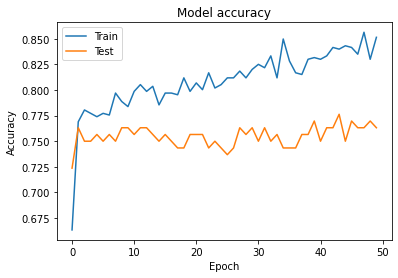

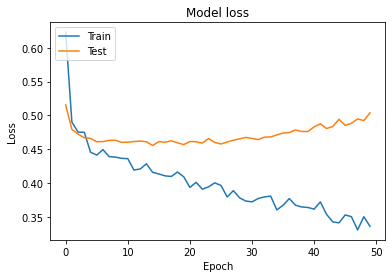

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()